# Stroke Prediction Project

## Author: Zarema Kharachyk

## Problem - Design and develop Machine learning model to predict Stroke using Logistic Regression, Decision Tree, and Naive Bayes Algorithms.

## Import Libraries

In [55]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


## Load Dataset

In [56]:
# Load data
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


## Data Exploration

In [57]:
# Count rows and columns
df.shape

(5110, 12)

In [58]:
# Show Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [59]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

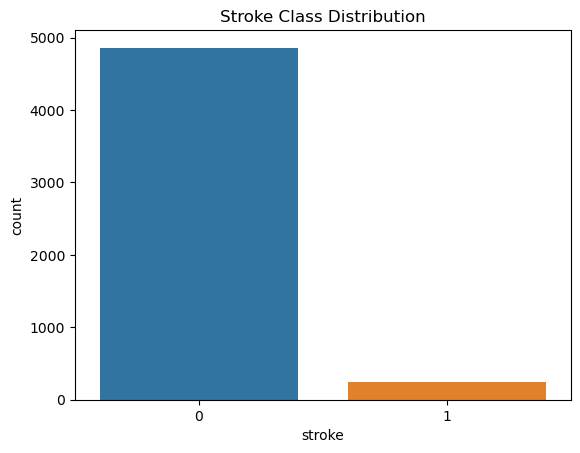

In [60]:
# Visualize target variable distribution
sns.countplot(x='stroke', data=df)
plt.title("Stroke Class Distribution")
plt.show()

## Data Preprocessing

In [61]:
# Drop ID column
df.drop('id', axis=1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [62]:
# Handle missing values in 'bmi'
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [63]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [64]:
# Replace 'Other' gender with 'Male' to avoid encoding issue
df['gender'] = df['gender'].replace('Other', 'Male')


### Encode Categorical Features

In [65]:
# One-hot encode categorical features
df = pd.get_dummies(df, drop_first=True)

### Split and scale Features

In [66]:
# Feature and target split
X = df.drop('stroke', axis=1)
y = df['stroke']

In [67]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [68]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modeling and Evoluation

## Logistic Regression Model

In [69]:
# Train Logistic Regression
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_model.fit(X_train, y_train)
# Predict
lr_pred = lr_model.predict(X_test)


In [70]:
# Calculate Accuracy and F1 score
lr_acc = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

In [71]:
# Show the result
print("Logistic Regression:")
print("Accuracy:", round(lr_acc, 2))
print("F1 Score:", round(lr_f1, 2))


Logistic Regression:
Accuracy: 0.75
F1 Score: 0.24


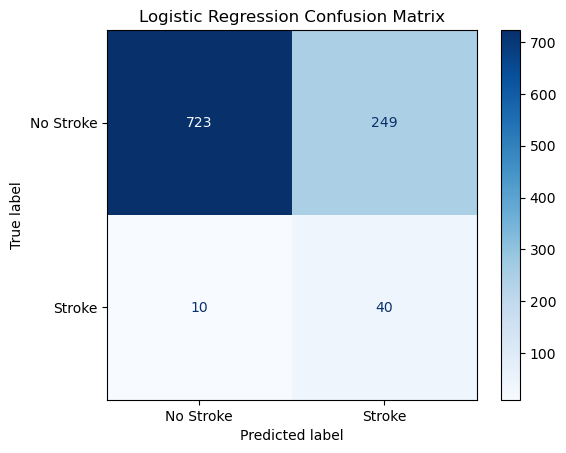

In [72]:
cm_lr = confusion_matrix(y_test, lr_pred)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["No Stroke", "Stroke"])
disp_lr.plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

## Decision Tree Model

In [73]:
# decision Tree
dt_model = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [74]:
# calculate Accuracy and F1 score
dt_acc = accuracy_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

In [75]:
# Show the result
print("Decision Tree:")
print("Accuracy:", round(dt_acc, 2))
print("F1 Score:", round(dt_f1, 2))

Decision Tree:
Accuracy: 0.92
F1 Score: 0.13


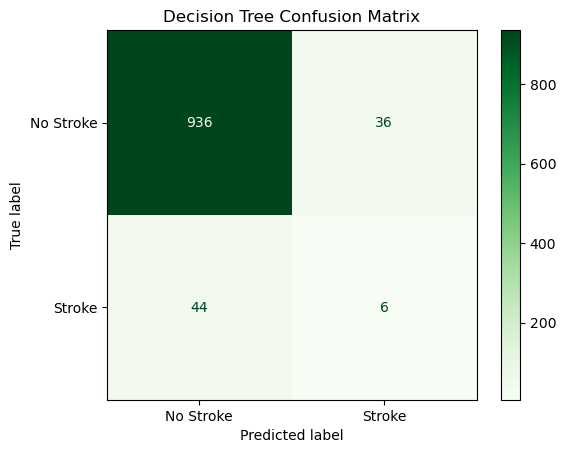

In [76]:
cm_dt = confusion_matrix(y_test, dt_pred)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=["No Stroke", "Stroke"])
disp_dt.plot(cmap="Greens")
plt.title("Decision Tree Confusion Matrix")
plt.show()

## Naive Bayes Model

In [77]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)  
nb_pred = nb_model.predict(X_test)

In [78]:
nb_acc = accuracy_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred)

In [79]:
print("Naive Bayes:")
print("Accuracy:", round(nb_acc, 2))
print("F1 Score:", round(nb_f1, 2))

Naive Bayes:
Accuracy: 0.32
F1 Score: 0.12


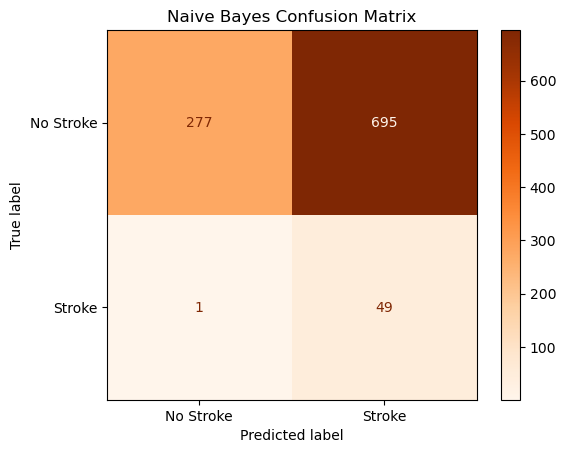

In [80]:
cm_nb = confusion_matrix(y_test, nb_pred)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=["No Stroke", "Stroke"])
disp_nb.plot(cmap="Oranges")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

### Final choice: Logistic Regression – It has the best F1 Score and handles the imbalanced data better.